In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [31]:
loans_df = pd.read_csv('../loan.csv',encoding='utf-8')

/Users/aarora7/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
loans_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [33]:
loans_df.shape

(39717, 111)

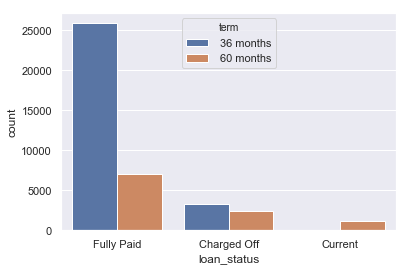

In [34]:
sns.set(style="darkgrid")
ax = sns.countplot(x="loan_status", hue="term",data=loans_df)

In [35]:
loans_df.tax_liens.unique()

array([ 0., nan])

In [13]:
loans_df.loan_status = loans_df.loan_status.map(lambda x: renameCols(x))

In [14]:
def renameCols(x):
    if x.lower().startswith("fully"):
        return 1
    if x.lower().startswith("charged"):
        return 2
    else:
        return 3

In [15]:
loans_defaulted_df = loans_df.loc[loans_df.loan_status==2]

In [41]:
s = loans_df.isnull().all()

In [42]:
s

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
emp_title                     False
emp_length                    False
home_ownership                False
annual_inc                    False
verification_status           False
issue_d                       False
loan_status                   False
pymnt_plan                    False
url                           False
desc                          False
purpose                       False
title                         False
zip_code                      False
addr_state                    False
dti                           False
delinq_2yrs                   False
earliest_cr_line              False
inq_last_6mths              

In [40]:
#Removing useless columns
loans_df = loans_df.dropna(how='all',axis=1)

In [51]:
#Check if there are columns with just 1 unique value, which makes them useless
single_val_cols = []
for col in loans_df.columns:
    num_uniques = len(loans_df[col].unique())
    if num_uniques == 1:
        single_val_cols.append(col)

In [49]:
#Remove columns with just 1 unique value
loans_df = loans_df.drop(single_val_cols, axis=1)

In [60]:
#Now find columns with 2 unique vals, since that can be nan and 1 unique
for col in loans_df.columns:
    unique_vals = loans_df[col].unique()
    num_uniques = len(unique_vals)
    if num_uniques == 2:
        print (col, unique_vals)
        print("**")

term [' 36 months' ' 60 months']
**
collections_12_mths_ex_med [ 0. nan]
**
chargeoff_within_12_mths [ 0. nan]
**
tax_liens [ 0. nan]
**


In [61]:
loans_df = loans_df.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'], axis=1)

In [62]:
#Final shape
loans_df.shape

(39717, 48)

In [66]:
loans_df =loans_df[pd.notnull(loans_df['emp_length'])]


In [67]:
len(loans_df)

38642

In [75]:
loans_df.emp_length.unique()

array(['10', 0, '1', '3', '8', '9', '4', '5', '6', '2', '7'], dtype=object)

In [69]:
def clean_years(emplength):
    replaced = re.sub('year[s]*', '', emplength)
    return replaced.strip()

In [70]:
loans_df.emp_length = loans_df.emp_length.map(lambda x:clean_years(x))

In [72]:
loans_df.emp_length = loans_df.emp_length.map(lambda x: x.replace('+','') if '+' in x else x)

In [74]:
loans_df.emp_length = loans_df.emp_length.map(lambda x: 0 if x.startswith('<') else x)

In [76]:
loans_df.emp_length = loans_df.emp_length.map(lambda x: int(x))

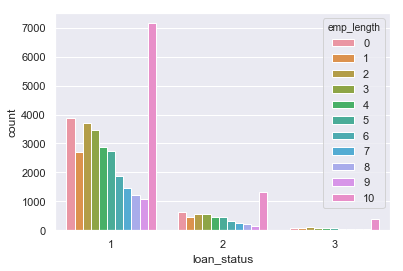

In [77]:
ax = sns.countplot(x="loan_status", hue="emp_length",data=loans_df)

Remove rendundant columns ~+1,-1 amongst each other
Useless columns which have ~0 correlation with loan_status
For emp_length, make it ratio based rather than absolute numbers.
Remove columns with all nulls (only 57 have any values at all)
Make correlation matrix, remove entries ~0
check if change in fico score has any effect on loan state


In [89]:
pd.set_option('display.max_columns', 500)

In [25]:
loans_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [94]:
pd.set_option('max_colwidth', -1)

In [63]:
#Finding correlation among all 48 columns
corr_mat = loans_df.corr()

In [64]:
corr_mat

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.086587,0.008731,0.095983,-0.008644,-0.042378,...,0.180591,0.140045,0.220838,0.112213,0.172856,-0.055082,0.033426,-0.013359,0.122365,-0.009505
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.081025,0.009380,0.096963,-0.008119,-0.047086,...,0.170706,0.139975,0.229307,0.112168,0.173234,-0.057750,0.031565,-0.015155,0.123627,-0.008769
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,-0.031864,0.009229,...,0.192623,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,-0.037180
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,-0.032355,0.009259,...,0.194675,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,-0.038502
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.038501,-0.005712,...,0.203693,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,-0.042746
installment,0.086587,0.081025,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,-0.019657,0.009722,...,0.124932,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688,-0.034103
annual_inc,0.008731,0.009380,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.023083,0.033908,...,0.033472,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401,-0.016801
dti,0.095983,0.096963,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,-0.034452,0.001405,...,0.036012,0.064766,0.071647,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005212,0.005691
delinq_2yrs,-0.008644,-0.008119,-0.031864,-0.032355,-0.038501,-0.019657,0.023083,-0.034452,1.000000,0.008091,...,-0.003203,-0.022695,-0.028976,-0.038795,0.023077,0.030609,0.012315,0.013912,-0.012149,0.003375
inq_last_6mths,-0.042378,-0.047086,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,0.008091,1.000000,...,-0.011780,-0.010559,-0.020277,-0.023433,0.021774,0.031215,0.018972,0.012420,0.028514,0.016346


In [67]:
loans_df.corrwith(loans_df.loan_status)

TypeError: ("unsupported operand type(s) for /: 'str' and 'int'", 'occurred at index id')